In [28]:
# 모듈 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc

In [29]:
# 폰트 등록
FONT_PATH = './font/malgun.ttf'
font_name = fm.FontProperties(fname=FONT_PATH).get_name()
rc('font', family=font_name)
# 그래프의 한글 텍스트가 깨지지 않기 위함.

In [30]:
# 파일 관련 변수들
DIR = './Data/'
GOOGLE01 = DIR + 'Accommodation_Search_Google.csv'
GOOGLE02 = DIR + 'Trip_Search_Google.csv'
COMPARISON = DIR + 'Accom_Compare.xlsx'
HOKANGS= DIR + 'hokangs.xlsx'
googleDF01 = pd.read_csv(GOOGLE01, skiprows=1)   # 불필요한 행 삭제
gooTripDF01 = pd.read_csv(GOOGLE02, skiprows=1)
compareDF01 = pd.read_excel(COMPARISON, skiprows=6)
hokangsDF= pd.read_excel(HOKANGS, skiprows=6)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
# 정보 보기
googleDF01.info(), gooTripDF01.info(), compareDF01.info(), hokangsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   주          235 non-null    object
 1   Geo: 대한민국  235 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   주           235 non-null    object
 1   여행: (대한민국)  235 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      54 non-null     object 
 1   호텔      54 non-null     float64
 2   날짜.1    54 non-null     object 
 3   모텔      54 non-null     float64
 4   날짜.2    54 non-null     object 
 5   민박      5

(None, None, None, None)

In [32]:
googleDF01.head(3)

,주,Geo: 대한민국
0,2018-01-07,33
1,2018-01-14,30
2,2018-01-21,27


In [33]:
gooTripDF01.head(3)

,주,여행: (대한민국)
0,2018-01-07,66
1,2018-01-14,47
2,2018-01-21,29


In [34]:
compareDF01.head(3)

,날짜,호텔,날짜.1,모텔,날짜.2,민박,날짜.3,게스트하우스,날짜.4,여인숙
0,2018-01-01,36.04332,2018-01-01,36.50857,2018-01-01,1.87899,2018-01-01,17.94175,2018-01-01,4.14713
1,2018-02-01,32.31231,2018-02-01,29.25860,2018-02-01,2.15537,2018-02-01,52.00957,2018-02-01,2.20553
2,2018-03-01,33.40090,2018-03-01,33.58803,2018-03-01,2.46635,2018-03-01,25.44804,2018-03-01,2.51512


In [35]:
hokangsDF.head(3)

,날짜,여행,날짜.1,호캉스
0,2018-01-01,46.42618,2018-01-01,4.65206
1,2018-02-01,37.12604,2018-02-01,4.82396
2,2018-03-01,48.09970,2018-03-01,4.97623


In [36]:
# 결측치 확인
googleDF01.isna().sum(), gooTripDF01.isna().sum(), compareDF01.isna().sum(), hokangsDF.isna().sum()

(주            0
 Geo: 대한민국    0
 dtype: int64,
 주             0
 여행: (대한민국)    0
 dtype: int64,
 날짜        0
 호텔        0
 날짜.1      0
 모텔        0
 날짜.2      0
 민박        0
 날짜.3      0
 게스트하우스    0
 날짜.4      0
 여인숙       0
 dtype: int64,
 날짜      0
 여행      0
 날짜.1    0
 호캉스     0
 dtype: int64)

In [37]:
# 컬럼명 변경
try:
    googleDF01.rename(columns={'주' : '날짜', 'Geo: 대한민국' : '숙박'},
                     inplace=True)
    gooTripDF01.rename(columns={'주' : '날짜', 'Geo: 대한민국' : '숙박'},
                     inplace=True)
except KeyError:
    pass
gooTripDF01

,날짜,여행: (대한민국)
0,2018-01-07,66
1,2018-01-14,47
2,2018-01-21,29
3,2018-01-28,39
4,2018-02-04,29
...,...,...
230,2022-06-05,34
231,2022-06-12,19
232,2022-06-19,47
233,2022-06-26,20


In [38]:
# 컬럼 삭제
try:
    compareDF01.drop(['날짜.1', '날짜.2', '날짜.3', '날짜.4'], axis=1, inplace=True)
    hokangsDF.drop(['날짜.1'], axis=1, inplace=True)
except KeyError:
    pass
hokangsDF

,날짜,여행,호캉스
0,2018-01-01,46.42618,4.65206
1,2018-02-01,37.12604,4.82396
2,2018-03-01,48.09970,4.97623
3,2018-04-01,49.20812,6.33612
4,2018-05-01,61.04016,9.38844
5,2018-06-01,100.00000,18.49924
6,2018-07-01,87.48146,61.89019
7,2018-08-01,63.63857,67.93631
8,2018-09-01,50.02180,21.23102
9,2018-10-01,50.10539,16.79701


In [39]:
# 일주일 단위의 데이터를 월 단위로

# '날짜'를 인덱스 -> 컬럼으로 옮기고
# int/float -> datetime으로 형변환 astype / to_datetime
# 오름차순 정렬
# 월별로 나누기(pd.to_datetime)

In [40]:
# '날짜' 컬럼 타입 확인
googleDF01['날짜'].dtypes, gooTripDF01['날짜'].dtypes

(dtype('O'), dtype('O'))

In [41]:
# '날짜' 컬럼 타입 Object => datetime 변환 astype / pd.to_datetime
try:
    googleDF01['날짜'] = pd.to_datetime(googleDF01['날짜'])
    gooTripDF01['날짜'] = pd.to_datetime(gooTripDF01['날짜'])
except Exception:
    pass
googleDF01['날짜'].info(), gooTripDF01['날짜'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 235 entries, 0 to 234
Series name: 날짜
Non-Null Count  Dtype         
--------------  -----         
235 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 235 entries, 0 to 234
Series name: 날짜
Non-Null Count  Dtype         
--------------  -----         
235 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 KB


(None, None)

In [42]:
# 오름차순 정렬
googleDF01['날짜'] = sorted(googleDF01['날짜'])
gooTripDF01['날짜'] = sorted(gooTripDF01['날짜'])

In [43]:
# 객체변수명.dt.to_period
try:
    googleDF01['날짜'] = googleDF01['날짜'].dt.to_period(freq='M')
    gooTripDF01['날짜'] = gooTripDF01['날짜'].dt.to_period(freq='M')
except Exception:
    pass

In [44]:
# 데이터프레임.groupby(그룹이되는컬럼)[계산하고 싶은 컬럼].집계함수()
monthDF = googleDF01.groupby(['날짜']).mean()
monthTripDF = gooTripDF01.groupby(['날짜']).mean()
monthTripDF.head()

,여행: (대한민국)
날짜,
2018-01,45.25
2018-02,31.75
2018-03,39.00
2018-04,28.60
2018-05,25.50


In [45]:
# 날짜 -> period 타입 / groupby 과정으로 인덱스인 상태 => 컬럼으로 꺼냄
# astype으로 오브젝트(str) 형변환 후그래프 그리기  
mD = monthDF.reset_index()
mTD = monthTripDF.reset_index()

mD['날짜'] = mD['날짜'].astype(str) # period에서 바로 datetime 형변환하려고 하면 오류 발생하기 때문
mD['날짜'] = pd.to_datetime(mD['날짜']) # str상태에서 최대최소값 구할 수 없음. 데이트타임으로 다시 형변환

mTD['날짜'] = mTD['날짜'].astype(str)
mTD['날짜'] = pd.to_datetime(mTD['날짜'])

In [46]:
mDdr = pd.date_range(start=mD['날짜'].min(), end=mD['날짜'].max(), freq='6M')  # x축 설정, 빈도
mDdr
#monthDFdate_range

DatetimeIndex(['2018-01-31', '2018-07-31', '2019-01-31', '2019-07-31',
               '2020-01-31', '2020-07-31', '2021-01-31', '2021-07-31',
               '2022-01-31'],
              dtype='datetime64[ns]', freq='6M')

In [47]:
# 그래프 x축이 같은지 확인
len(monthDF.index), len(monthTripDF.index)

(55, 55)

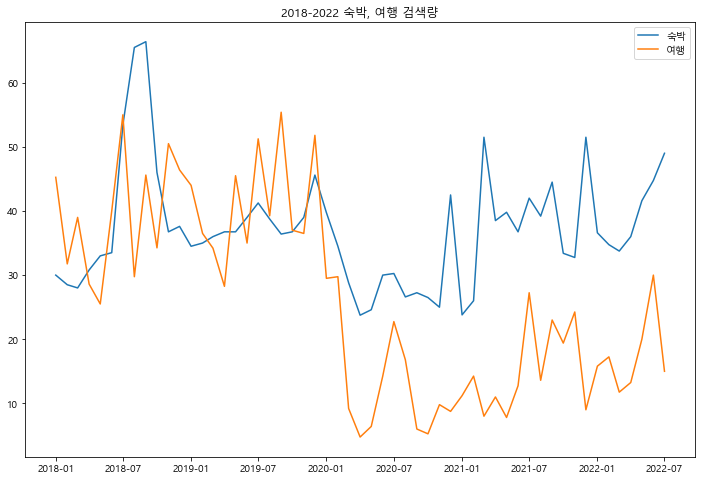

In [48]:
# 날짜 -> period 타입 / 인덱스인 상태
# 컬럼으로 꺼냄
# astype으로 오브젝트(str) 형변환
# 그래프 그리기  
plt.figure(figsize = (12,8))
line1 = plt.plot(mD['날짜'], mD['숙박'], label='숙박')
line2 = plt.plot(mTD['날짜'], mTD['여행: (대한민국)'], label='여행')
plt.title('2018-2022 숙박, 여행 검색량')
lines=line1+line2
labels=[l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')


In [49]:
try:
    compareDF01['날짜'] = pd.to_datetime(compareDF01['날짜'])
    hokangsDF['날짜'] = pd.to_datetime(hokangsDF['날짜'])
    compareDF01.set_index(['날짜'], inplace=True)
    hokangsDF.set_index(['날짜'], inplace=True)
except KeyError:
    pass
compareDF01

,호텔,모텔,민박,게스트하우스,여인숙
날짜,,,,,
2018-01-01,36.04332,36.50857,1.87899,17.94175,4.14713
2018-02-01,32.31231,29.25860,2.15537,52.00957,2.20553
2018-03-01,33.40090,33.58803,2.46635,25.44804,2.51512
2018-04-01,31.82181,34.98759,1.95059,13.74515,2.73131
2018-05-01,34.62127,41.27662,2.45043,13.87417,2.58326
2018-06-01,33.59322,38.07901,2.25050,13.44628,2.25534
2018-07-01,45.08822,43.99791,4.23776,17.65291,2.58776
2018-08-01,42.98335,48.11772,3.11286,15.39238,2.64345
2018-09-01,31.91382,38.03023,1.54449,11.32549,2.04157


<function matplotlib.pyplot.show(close=None, block=None)>

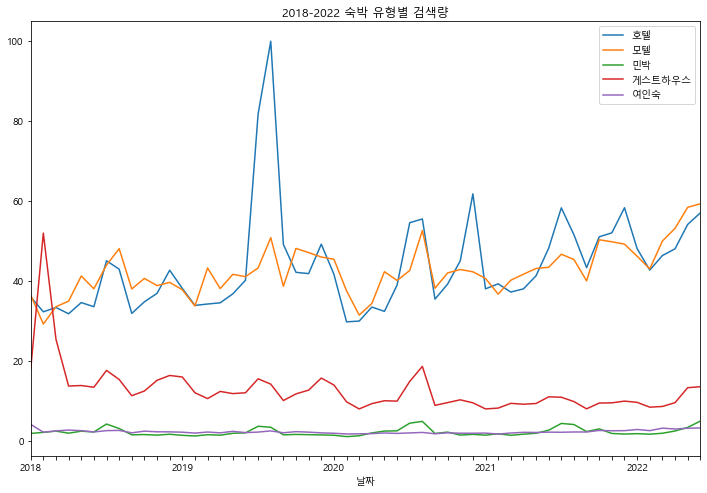

In [50]:
# 숙박업소 유형별 비교
compare_dr = pd.date_range(start=mD['날짜'].min(), end=mD['날짜'].max(), freq='6M')
compareDF01.plot(figsize = (12,8))
plt.title('2018-2022 숙박 유형별 검색량')
plt.xticks(list(compareDF01.index))
plt.show

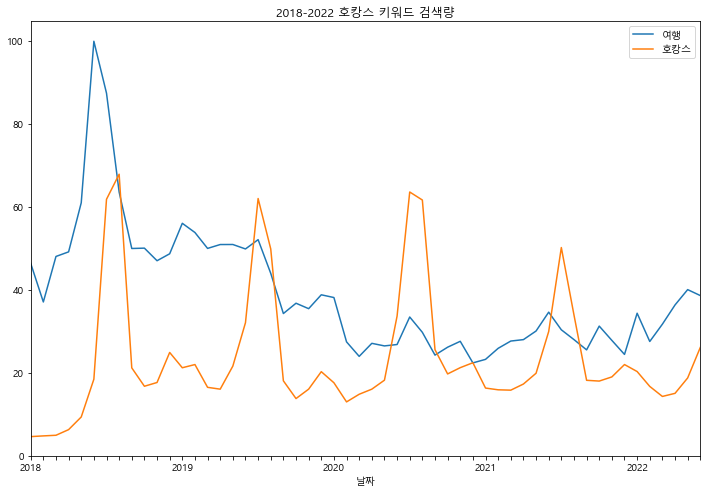

In [51]:
hokangsDF.plot(figsize = (12,8))
plt.title('2018-2022 호캉스 키워드 검색량')
plt.xticks(list(hokangsDF.index))
plt.show()

In [52]:
# '날짜' 컬럼 -> 인덱스
# 상관계수 분석을 위해 DF객체 결합
try:
    googleDF01.set_index(['날짜'], inplace=True)
    gooTripDF01.set_index(['날짜'], inplace=True)
except KeyError:
    pass
gooConcat = pd.concat([googleDF01,gooTripDF01], axis=1)
gooCorr = gooConcat.corr()
gooCorr

,숙박,여행: (대한민국)
숙박,1.000000,0.218649
여행: (대한민국),0.218649,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

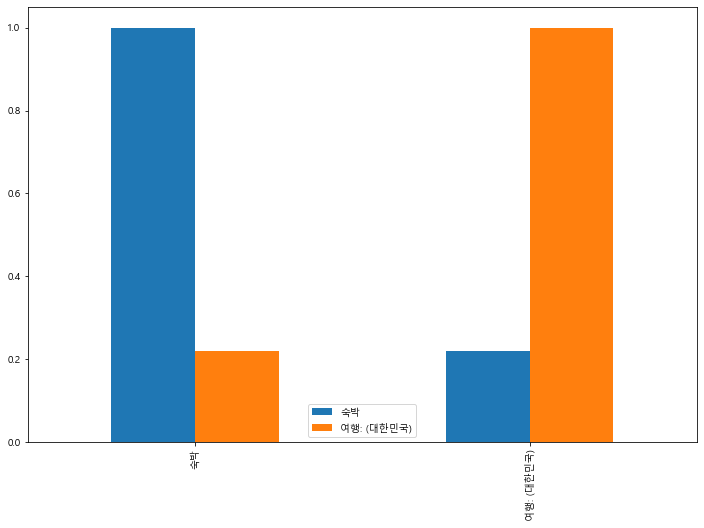

In [53]:
gooCorr.plot(kind='bar', figsize = (12,8))
plt.show